# School

In [1]:
import pathlib
import numpy as np

import pandas as pd
pd.options.display.max_columns = None

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# import lux

In [2]:
# School questionnaire data file
df_school = pd.read_spss("../raw_data/unzipped/CY08MSP_SCH_QQQ.SAV")

# For Now, Drop All Survey Question Columns

In [3]:
df_school = df_school[df_school.columns.drop(list(df_school.filter(regex='^SC\d.*')))]

# Correct DType

In [4]:
# NatCen: National Centre 6-digit Code
map_NatCen = pd.read_csv("../map/SCH_QQQ_NatCen.csv", header=None)
df_school.replace(
    {
        "NatCen": map_NatCen
    }, 
    inplace=True
)

In [5]:
# CONVERT to categorical
columns = [
    "CNTSCHID", # Intl. School ID
    "CYC", # PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
    "PRIVATESCH", # School type derived from sampling information; values = public, private, missing
    "VER_DAT", # Date of the database creation
]

for col in columns:
    df_school[col] = df_school[col].astype('category')

In [6]:
# CONVERT to numerical
columns = [
    "SCHSIZE", # School size (Sum)
    "TOTAT", # Total number of all teachers at school (Sum)
    "PROATCE", # Proportion of all teachers fully certified
    "PROPAT6", # Proportion of all teachers with at least ISCED level 6 Bachelor qualification
    "PROPAT7", # Proportion of all teachers with at least ISCED level 7 Master qualification
    "PROPAT8", # Proportion of all teachers with ISCED level 8 Doctoral qualification
    "STRATIO", # Student-teacher ratio
    "TOTMATH", # Total number of mathematics teachers at school (Sum)
    "PROPMATH", # Proportion of mathematics teachers at school
    "SMRATIO", # Student-mathematics teacher ratio
    "TOTSTAFF", # Total number of non-teaching staff at school
    "PROPSUPP", # Proportion of personnel for pedagogical support
    "PROADMIN", # Proportion of school administrative personnel
    "PROMGMT", # Proportion of school management personnel    
    "PROOSTAF", # Proportion of other non-teaching staff
    "SCHAUTO", # School autonomy (WLE)
    "TCHPART", # Teacher participation (WLE)
    "SRESPCUR", # School responsibility for curriculum
    "SRESPRES", # School responsibility for resources
    "EDULEAD", # Educational leadership (WLE)
    "INSTLEAD", # Instructional leadership (WLE)
    "ENCOURPG", # School encouragement of parent or guardian involvement (WLE)
    "RATCMP1", # Availability of computers    
    "RATCMP2", # Computers connected to the Internet
    "RATTAB", # Availability of tablet devices
    "DIGDVPOL", # Digital device policies at school (WLE)
    "TEAFDBK", # Feedback to teachers (WLE)
    "MTTRAIN", # Mathematics teacher training (WLE)
    "DMCVIEWS", # School diversity and multi-cultural views (WLE)
    "NEGSCLIM", # Negative school climate (WLE)
    "STAFFSHORT", # Shortage of educational staff (WLE)
    "EDUSHORT", # Shortage of educational material (WLE)
    "STUBEHA", # Student-related factors affecting school climate (WLE)
    "TEACHBEHA", # Teacher-related factors affecting school climate (WLE)
    "STDTEST", # Use of standardized tests (WLE)
    "TDTEST", # Use of teacher-developed tests (WLE)
    "BCREATSC", # Beliefs about creativity (WLE)
    "CREENVSC", # Creative school environment (WLE)
    "ACTCRESC", # Creative school activities offered (WLE)
    "OPENCUL", # Openness culture/climate (WLE)
    "PROBSCRI", # Problems with Schools’ Capacity to Provide Remote Instruction (WLE)
    "SCPREPBP", # School Preparation for Remote Instruction, Before Pandemic (WLE)
    "SCPREPAP", # School Preparation for Remote Instruction, In Response to Pandemic (WLE)
    "DIGPREP", # Preparedness for Digital Learning (WLE)
]

for col in columns:
    number_of_filled_columns = df_school[col].count()
    s_temp = pd.to_numeric(df_school[col], errors='coerce')
    number_of_filled_columns_post = s_temp.count()
    assert number_of_filled_columns == number_of_filled_columns_post, f"In converting {col}, got {number_of_filled_columns_post} NaNs != {number_of_filled_columns} NaNs"
    df_school[col] = s_temp

In [7]:
print(list(df_school.columns))

['CNT', 'CNTRYID', 'CNTSCHID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'PRIVATESCH', 'SCHLTYPE', 'SCHSIZE', 'TOTAT', 'PROATCE', 'PROPAT6', 'PROPAT7', 'PROPAT8', 'STRATIO', 'TOTMATH', 'PROPMATH', 'SMRATIO', 'TOTSTAFF', 'PROPSUPP', 'PROADMIN', 'PROMGMT', 'PROOSTAF', 'SCHSEL', 'SCHAUTO', 'TCHPART', 'SRESPCUR', 'SRESPRES', 'EDULEAD', 'INSTLEAD', 'ENCOURPG', 'RATCMP1', 'RATCMP2', 'RATTAB', 'DIGDVPOL', 'TEAFDBK', 'MTTRAIN', 'DMCVIEWS', 'NEGSCLIM', 'STAFFSHORT', 'EDUSHORT', 'STUBEHA', 'TEACHBEHA', 'MCLSIZE', 'CLSIZE', 'STDTEST', 'TDTEST', 'CREACTIV', 'ALLACTIV', 'MACTIV', 'MATHEXC', 'ABGMATH', 'BCREATSC', 'CREENVSC', 'ACTCRESC', 'OPENCUL', 'SCSUPRTED', 'SCSUPRT', 'PROBSCRI', 'SCPREPBP', 'SCPREPAP', 'DIGPREP', 'W_SCHGRNRABWT', 'W_FSTUWT_SCH_SUM', 'W_FSTUWT_SCH_N', 'SENWT', 'VER_DAT']


In [8]:
assert len(df_school[df_school["CNT"] != df_school["CNTRYID"]]) == 0, f'{len(df_school[df_school["CNT"] != df_school["CNTRYID"]])} is not 0'

In [9]:
df_school

,CNT,CNTRYID,CNTSCHID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,ADMINMODE,LANGTEST_QQQ,PRIVATESCH,SCHLTYPE,SCHSIZE,TOTAT,PROATCE,PROPAT6,PROPAT7,PROPAT8,STRATIO,TOTMATH,PROPMATH,SMRATIO,TOTSTAFF,PROPSUPP,PROADMIN,PROMGMT,PROOSTAF,SCHSEL,SCHAUTO,TCHPART,SRESPCUR,SRESPRES,EDULEAD,INSTLEAD,ENCOURPG,RATCMP1,RATCMP2,RATTAB,DIGDVPOL,TEAFDBK,MTTRAIN,DMCVIEWS,NEGSCLIM,STAFFSHORT,EDUSHORT,STUBEHA,TEACHBEHA,MCLSIZE,CLSIZE,STDTEST,TDTEST,CREACTIV,ALLACTIV,MACTIV,MATHEXC,ABGMATH,BCREATSC,CREENVSC,ACTCRESC,OPENCUL,SCSUPRTED,SCSUPRT,PROBSCRI,SCPREPBP,SCPREPAP,DIGPREP,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,W_FSTUWT_SCH_N,SENWT,VER_DAT
0,Albania,Albania,800001.0,08MS,Albania,ALB - stratum 05: Urban / South / Public,Albania,Albania,No,Computer,Albanian,public,Public,652.0,38.5,1.0000,0.0779,0.0779,0.0519,16.9351,5.0,0.1299,100.0,13.0,0.3077,0.0769,0.2308,0.3846,at least one factor was considered always,-0.4178,NaN,0.5,0.3333,0.9403,0.9572,0.9212,0.1564,1.00,0.1173,-0.0598,0.8961,-0.0313,0.4944,-1.6916,-0.2968,1.2048,0.6058,-0.5488,31-35 students,31-35 students,0.9589,0.1717,No creative extra-curricular activities offered,-0.3384,1 mathematics-related extra-curricular activit...,NaN,At least one form of ability grouping in all c...,-0.3682,0.3518,-1.0019,0.5652,A lot of support from education authorities,A lot of support from other resources,0.7965,-0.8314,0.8462,0.5908,1.43376,160.58080,41.0,5.76182,03MAY23:10:11:34
1,Albania,Albania,800002.0,08MS,Albania,ALB - stratum 07: Rural / North / Public and P...,Albania,Albania,No,Computer,Albanian,public,Public,183.0,16.0,1.0000,0.4375,0.2500,0.0000,11.4375,3.0,0.1875,61.0,4.0,0.2500,0.0000,0.2500,0.5000,at least one factor was considered always,-0.5280,NaN,1.0,0.6000,-0.1642,-0.1660,-0.3835,0.0000,0.00,0.0000,1.3483,0.4869,1.0982,1.2535,-1.6916,-1.4551,2.9595,-0.0956,-2.0409,15 students or fewer,15 students or fewer,0.7237,1.5226,1 creative extra-curricular activity offered,0.4074,4 mathematics-related extra-curricular activit...,Mathematics extension courses offered for enri...,At least one form of ability grouping in all c...,-0.9046,2.1631,-0.6079,0.0911,A lot of support from education authorities,Some support from other resources,-0.5687,-0.8314,0.8462,-0.3475,2.85278,133.71140,36.0,11.46442,03MAY23:10:11:34
2,Albania,Albania,800003.0,08MS,Albania,ALB - stratum 06: Urban / South / Private,Albania,Albania,No,Computer,Albanian,private,Private independent,121.0,17.0,1.0000,1.0000,0.7647,0.0000,7.1176,2.0,0.1176,60.5,4.0,0.0000,0.2500,0.7500,0.0000,at least one factor was considered always,1.4001,NaN,5.0,7.0000,-0.1686,-0.2686,-0.0248,2.0000,1.00,0.0000,0.0889,0.4569,0.0794,0.0836,2.0223,0.2833,0.6299,1.3399,0.2266,15 students or fewer,15 students or fewer,-0.2921,-0.9681,2 creative extra-curricular activities offered,-0.8108,No mathematics-related extra-curricular activi...,NaN,At least one form of ability grouping in all c...,0.1019,0.4118,-0.2771,-0.8952,Some support from education authorities,Some support from other resources,0.1896,-0.8314,-0.8711,0.4409,7.40007,25.61079,3.0,29.73857,03MAY23:10:11:34
3,Albania,Albania,800004.0,08MS,Albania,ALB - stratum 05: Urban / South / Public,Albania,Albania,No,Computer,Albanian,public,Public,1074.0,63.5,0.9449,0.2362,0.2047,0.0000,16.9134,8.0,0.1260,100.0,11.0,0.0000,0.0000,0.3636,0.6364,at least one factor was considered always,0.2405,NaN,0.5,1.6667,0.0243,0.1402,0.4919,0.1838,0.64,0.0000,1.3483,0.4795,1.0982,2.1585,-0.8905,-1.4551,1.6863,-0.7912,-0.9138,26-30 students,26-30 students,-0.1123,1.4914,No creative extra-curricular activities offered,-0.1653,3 mathematics-related extra-curricular activit...,Mathematics extension courses offered without ...,At least one form of ability grouping in all c...,-0.9046,1.1180,-1.1844,-0.4642,NaN,NaN,NaN,NaN,NaN,-0.7414,4.34319,192.24130,39.0,17.45392,03MAY23:10:11:34
4,Albania,Albania,800005.0,08MS,Albania,ALB - stratum 03: Urban / Center / Public,Albania,Albania,No,Computer,Albanian,public,Public,317.0,27.0,0.9630,NaN,0.5556

## Which Rows/Cols Have NaNs?

(80, 71)


,MATHEXC,PROPAT6,SCPREPAP,SCSUPRTED,SCSUPRT,PROBSCRI,SCPREPBP,DIGDVPOL,RATCMP2,TCHPART,RATCMP1,STDTEST,ALLACTIV,ACTCRESC,PROPAT7,PROATCE,RATTAB,TDTEST,STRATIO,SCHAUTO,SMRATIO,PROPAT8,STAFFSHORT,DMCVIEWS,PROOSTAF,SRESPRES,PROADMIN,BCREATSC,DIGPREP,STUBEHA,SCHSIZE,PROPMATH,ABGMATH,CREACTIV,TEAFDBK,SRESPCUR,MCLSIZE,CLSIZE,OPENCUL,MACTIV,CREENVSC,TEACHBEHA,INSTLEAD,ENCOURPG,NEGSCLIM,EDUSHORT,MTTRAIN,TOTAT,PROPSUPP,EDULEAD,PROMGMT,TOTMATH,SCHSEL,TOTSTAFF,SCHLTYPE,LANGTEST_QQQ,PRIVATESCH,ADMINMODE,SUBNATIO,STRATUM,NatCen,CYC,OECD,REGION,CNTSCHID,CNTRYID,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,W_FSTUWT_SCH_N,SENWT,VER_DAT
CNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Baku (Azerbaijan),0.477387,0.452261,0.467337,0.472362,0.452261,0.477387,0.467337,0.653266,0.608040,0.000000,0.577889,0.547739,0.582915,0.537688,0.592965,0.527638,0.562814,0.522613,0.608040,0.608040,0.613065,0.562814,0.603015,0.572864,0.592965,0.623116,0.597990,0.582915,0.582915,0.603015,0.638191,0.633166,0.603015,0.567839,0.618090,0.643216,0.633166,0.633166,0.603015,0.613065,0.582915,0.592965,0.648241,0.597990,0.613065,0.597990,0.603015,0.638191,0.597990,0.653266,0.628141,0.638191,0.633166,0.638191,1.000000,0.738693,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Hong Kong (China),0.588957,0.233129,0.000000,0.509202,0.509202,0.509202,0.509202,0.000000,0.662577,0.674847,0.638037,0.625767,0.000000,0.656442,0.693252,0.668712,0.638037,0.619632,0.662577,0.674847,0.662577,0.687117,0.650307,0.656442,0.668712,0.668712,0.668712,0.656442,0.656442,0.656442,0.711656,0.668712,0.656442,0.656442,0.656442,0.674847,0.656442,0.656442,0.656442,0.656442,0.656442,0.656442,0.674847,0.656442,0.656442,0.000000,0.656442,0.705521,0.668712,0.674847,0.668712,0.668712,0.674847,0.668712,0.987730,0.748466,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Jamaica,0.489796,0.496599,0.000000,0.605442,0.605442,0.612245,0.605442,0.680272,0.639456,0.693878,0.585034,0.496599,0.625850,0.632653,0.693878,0.687075,0.598639,0.000000,0.625850,0.693878,0.632653,0.639456,0.666667,0.659864,0.680272,0.673469,0.687075,0.639456,0.000000,0.666667,0.680272,0.673469,0.646259,0.625850,0.673469,0.680272,0.653061,0.646259,0.625850,0.639456,0.632653,0.666667,0.687075,0.653061,0.666667,0.666667,0.666667,0.693878,0.666667,0.687075,0.693878,0.687075,0.714286,0.693878,0.748299,0.802721,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Panama,0.176744,0.451163,0.586047,0.581395,0.567442,0.586047,0.586047,0.725581,0.600000,0.725581,0.590698,0.381395,0.660465,0.665116,0.679070,0.679070,0.618605,0.609302,0.590698,0.711628,0.600000,0.627907,0.706977,0.702326,0.651163,0.697674,0.679070,0.683721,0.000000,0.706977,0.725581,0.697674,0.660465,0.660465,0.711628,0.725581,0.679070,0.674419,0.679070,0.660465,0.688372,0.706977,0.720930,0.697674,0.702326,0.706977,0.711628,0.725581,0.679070,0.720930,0.697674,0.706977,0.730233,0.711628,0.939535,0.753488,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
New Zealand,0.467456,0.437870,0.000000,0.680473,0.680473,0.674556,0.674556,0.000000,0.733728,0.775148,0.739645,0.674556,0.000000,0.000000,0.662722,0.656805,0.721893,0.680473,0.710059,0.000000,0.721893,0.656805,0.721893,0.698225,0.692308,0.769231,0.727811,0.000000,0.704142,0.727811,0.000000,0.721893,0.704142,0.721893,0.710059,0.769231,0.715976,0.715976,0.692308,0.721893,0.698225,0.721893,0.763314,0.710059,0.715976,0.715976,0.704142,0.000000,0.721893,0.763314,0.733728,0.000000,0.757396,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukrainian regions (18 of 27),0.628049,0.859756,0.884146,0.871951,0.871951,0.878049,0.884146,0.000000,0.847561,0.000000,0.853659,0.963415,0.0

Text(0.5, 1.0, 'Which countries/features are more complete')

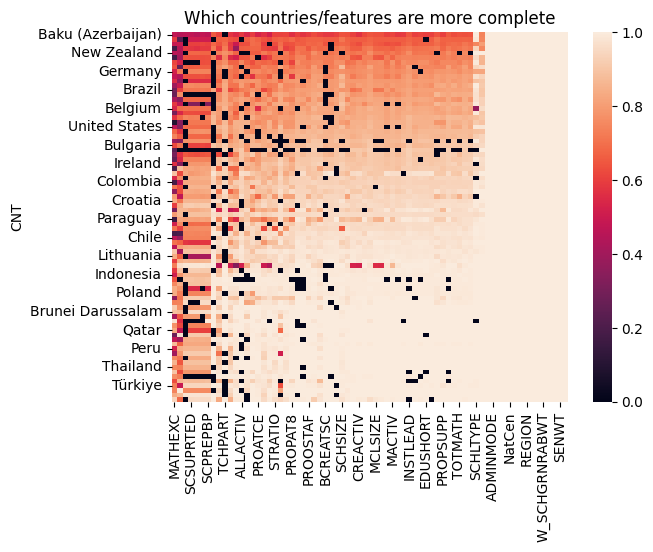

In [10]:
df = df_school.groupby("CNT", observed=False).count().div(df_school.groupby("CNT", observed=False).count()["CNTRYID"].values, axis=0)

df = df.loc[df.median(axis=1).sort_values(ascending=True).index]

df = df[df.median(axis=0).sort_values(ascending=True).index]

print(df.shape)
display(df)

sns.heatmap(df, annot=False)
plt.title("Which countries/features are more complete")

Text(0.5, 1.0, 'School Percentage of NaN Columns')

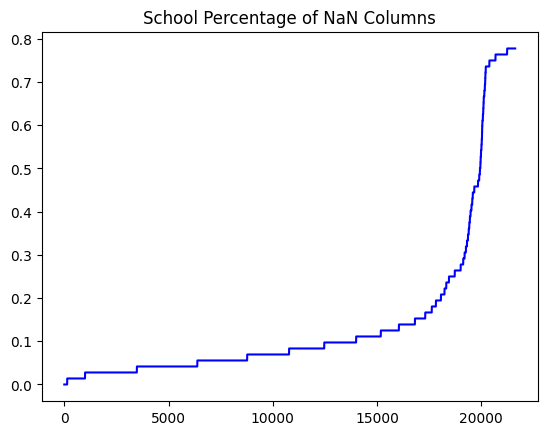

In [11]:
school_percentage_of_NaNs = (df_school.isnull().sum(axis=1).sort_values(ascending=True) / df_school.shape[1]).values
plt.plot(range(len(school_percentage_of_NaNs)), school_percentage_of_NaNs, "b-")
plt.title("School Percentage of NaN Columns")

Text(0.5, 1.0, 'Column Percentage of NaN Schools')

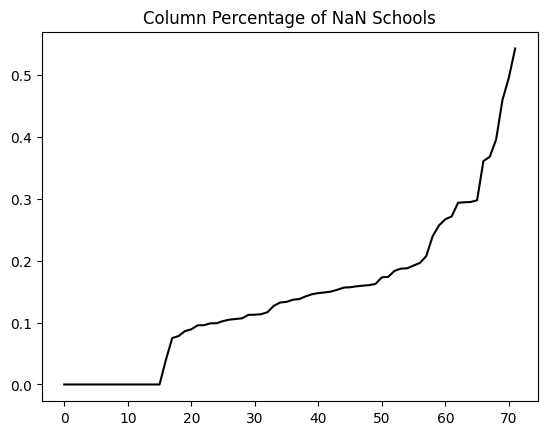

In [12]:
column_percentage_of_NaNs = (df_school.isnull().sum(axis=0).sort_values(ascending=True) / len(df_school))
plt.plot(range(len(column_percentage_of_NaNs)), column_percentage_of_NaNs, "k-")
plt.title("Column Percentage of NaN Schools")

In [13]:
df_school_filt = df_school.dropna(
    axis=1, thresh=int(0.8*df_school.shape[0])
)

df_school_filt = df_school_filt.dropna(
    axis=0, thresh=int(0.8*df_school_filt.shape[1])
)

In [14]:
print("Columns Filtered Out", set(df_school.columns) - set(df_school_filt.columns))

Columns Filtered Out {'TCHPART', 'STAFFSHORT', 'PROPAT6', 'ALLACTIV', 'BCREATSC', 'SCPREPBP', 'SCPREPAP', 'SCSUPRTED', 'ACTCRESC', 'DIGDVPOL', 'DMCVIEWS', 'SCHAUTO', 'SCSUPRT', 'PROBSCRI', 'MATHEXC'}


Text(0.5, 1.0, 'School Percentage of NaN Columns')

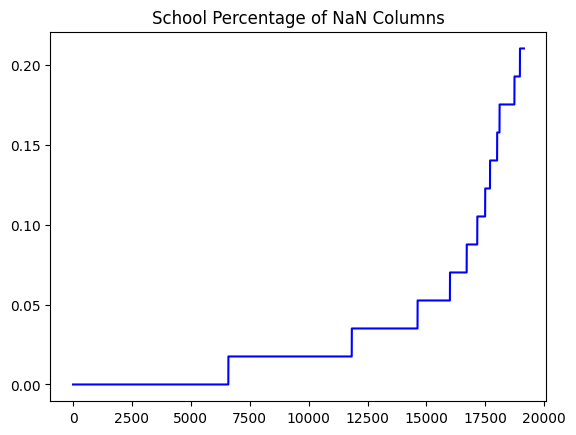

In [15]:
school_percentage_of_NaNs = (df_school_filt.isnull().sum(axis=1).sort_values(ascending=True) / df_school_filt.shape[1]).values
plt.plot(range(len(school_percentage_of_NaNs)), school_percentage_of_NaNs, "b-")
plt.title("School Percentage of NaN Columns")

Text(0.5, 1.0, 'Column Percentage of NaN Schools')

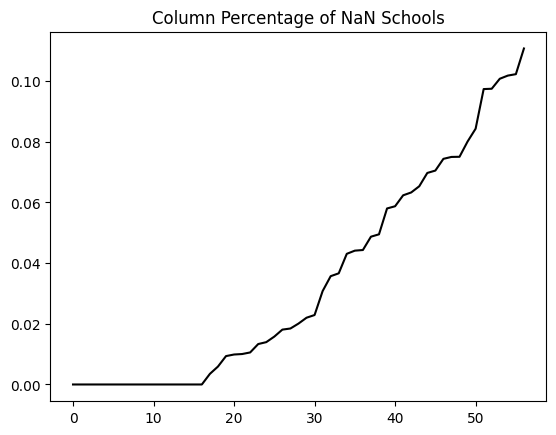

In [16]:
column_percentage_of_NaNs = (df_school_filt.isnull().sum(axis=0).sort_values(ascending=True) / len(df_school_filt))
plt.plot(range(len(column_percentage_of_NaNs)), column_percentage_of_NaNs, "k-")
plt.title("Column Percentage of NaN Schools")

(80, 56)


<bound method NDFrame.head of                     DIGPREP   PROATCE   STDTEST   RATCMP1   RATCMP2    TDTEST  \
CNT                                                                             
Canada             0.997080  0.929927  0.960584  0.913869  0.924088  0.995620   
Japan              1.000000  0.994475  0.000000  1.000000  0.994475  1.000000   
Cambodia           0.000000  1.000000  0.350575  0.528736  0.488506  0.459770   
Guatemala          0.959108  0.892193  0.550186  0.509294  0.550186  0.903346   
New Zealand        0.991150  0.920354  0.946903  0.982301  0.964602  0.955752   
...                     ...       ...       ...       ...       ...       ...   
Brunei Darussalam  1.000000  1.000000  1.000000  0.981481  0.981481  1.000000   
Philippines        1.000000  0.989362  0.984043  0.994681  0.984043  0.989362   
Malaysia           1.000000  1.000000  1.000000  0.989950  0.934673  1.000000   
Chinese Taipei     1.000000  1.000000  1.000000  0.994475  0.994475  1.000000  

Text(0.5, 1.0, '(After filtering out rows/cols with more than 80% NaN)\nWhich countries/features are more complete')

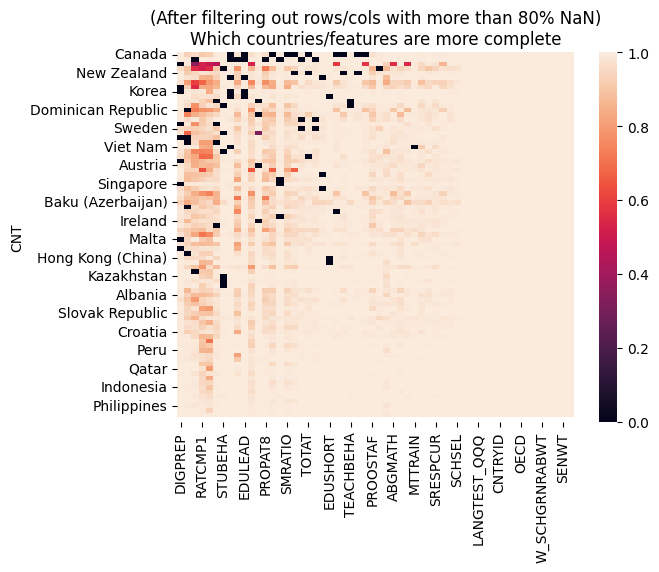

In [17]:
df = df_school_filt.groupby("CNT", observed=False).count().div(df_school_filt.groupby("CNT", observed=False).count()["CNTRYID"].values, axis=0)

df = df.loc[df.mean(axis=1).sort_values(ascending=True).index]

df = df[df.mean(axis=0).sort_values(ascending=True).index]

print(df.shape)
display(df.head)

sns.heatmap(df, annot=False)
plt.title("(After filtering out rows/cols with more than 80% NaN)\nWhich countries/features are more complete")

# Summarization

## Values with no NaNs
|Index|Column|Counts|
|---|---|---|   
|0|CNT|21629 non-null  category  
|1|CNTRYID|21629 non-null  category  
|2|CNTSCHID|21629 non-null  category  
|3|CYC|21629 non-null  category  
|4|NatCen|21629 non-null  category  
|5|STRATUM|21629 non-null  category  
|6|SUBNATIO|21629 non-null  category  
|7|REGION|21629 non-null  category  
|8|OECD|21629 non-null  category  
|9|ADMINMODE|21629 non-null  category  

In [18]:
c = df_school_filt.select_dtypes(include=["float64"]).corr().abs()
c.loc[:,:] = np.tril(c.values, k=-1)
c = c[c>0]

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

EDULEAD   INSTLEAD            0.970135
SCHSIZE   TOTAT               0.737164
TOTAT     TOTMATH             0.624146
STUBEHA   TEACHBEHA           0.612095
NEGSCLIM  STUBEHA             0.574708
                                ...   
SENWT     DIGPREP                  NaN
          W_SCHGRNRABWT            NaN
          W_FSTUWT_SCH_SUM         NaN
          W_FSTUWT_SCH_N           NaN
          SENWT                    NaN
Length: 1369, dtype: float64

Geographical Region
* `CNT` Country code 3-character
* `CNTRYID` Country Identifier
* `STRATUM` Stratum ID 5-character (cnt + original stratum ID)
* `SUBNATIO` Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
* `REGION` REGION
* `OECD` OECD country (no = 0, yes = 1)
* `NatCen` National Centre 6-digit Code

CNT
Spain                   966
Canada                  863
United Arab Emirates    840
Australia               743
Brazil                  598
                       ... 
North Macedonia         111
Montenegro               63
Brunei Darussalam        54
Malta                    46
Macao (China)            46
Name: count, Length: 80, dtype: int64

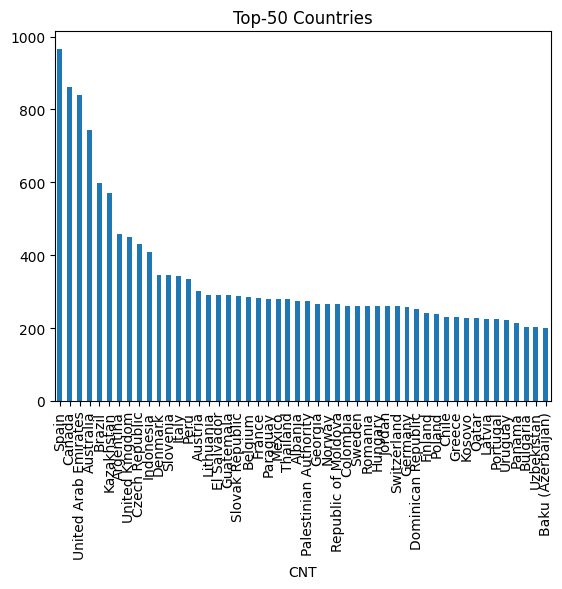

In [19]:
df_school['CNT'].value_counts().head(50).plot(kind='bar')
plt.title("Top-50 Countries")

display(df_school['CNT'].value_counts())

Survey Mode
* `ADMINMODE` Mode of Respondent
* `LANGTEST_QQQ` Language of Questionnaire
* `CYC` PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)

<Axes: xlabel='ADMINMODE'>

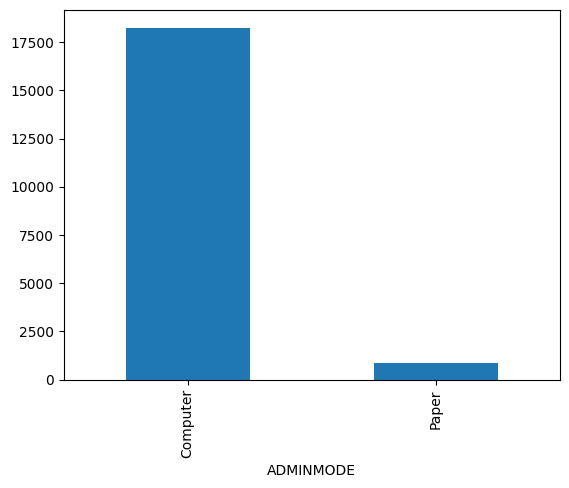

In [20]:
df_school_filt['ADMINMODE'].value_counts().plot(kind='bar')

<Axes: xlabel='LANGTEST_QQQ'>

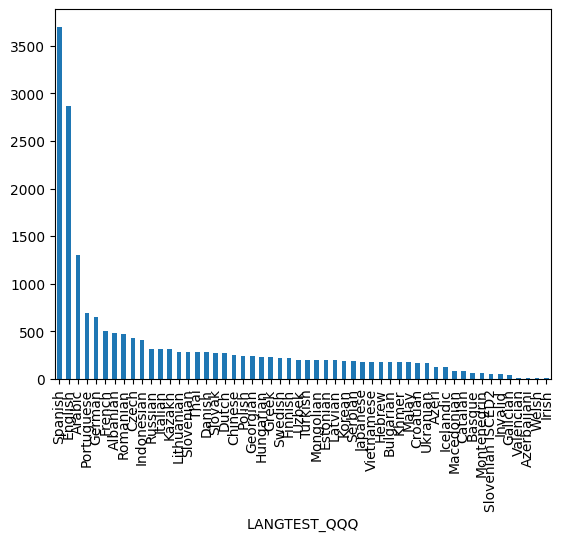

In [21]:
df_school_filt['LANGTEST_QQQ'].value_counts().plot(kind='bar')

<Axes: xlabel='CYC'>

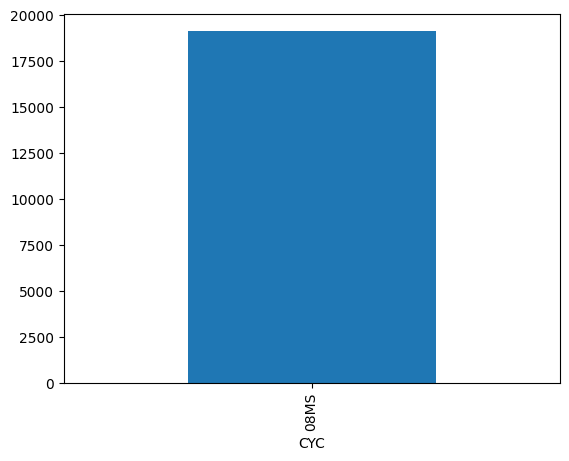

In [22]:
df_school_filt['CYC'].value_counts().plot(kind='bar')

School Staff
* `PRIVATESCH`: School type derived from sampling information; values = public, private, missing
* `SCHLTYPE` School type
* `SCHSIZE` School size (Sum)
* `TOTAT` Total number of all teachers at school (Sum)
* `PROATCE` Proportion of all teachers fully certified
* `PROPAT6`	Proportion of all teachers with at least ISCED level 6 Bachelor qualification
* `PROPAT7`	Proportion of all teachers with at least ISCED level 7 Master qualification
* `PROPAT8`	Proportion of all teachers with ISCED level 8 Doctoral qualification
* `STRATIO`	Student-teacher ratio
* `TOTMATH`	Total number of mathematics teachers at school (Sum)
* `PROPMATH`	Proportion of mathematics teachers at school
* `SMRATIO`	Student-mathematics teacher ratio
* `TOTSTAFF`	Total number of non-teaching staff at school
* `PROPSUPP`	Proportion of personnel for pedagogical support
* `PROADMIN`	Proportion of school administrative personnel
* `PROMGMT`	Proportion of school management personnel    
* `PROOSTAF`	Proportion of other non-teaching staff
* `STAFFSHORT`	Shortage of educational staff (WLE)
* `EDUSHORT`	Shortage of educational material (WLE)
* `MCLSIZE`	Math class size
* `CLSIZE`	Class size (test language class)

<Axes: xlabel='PRIVATESCH'>

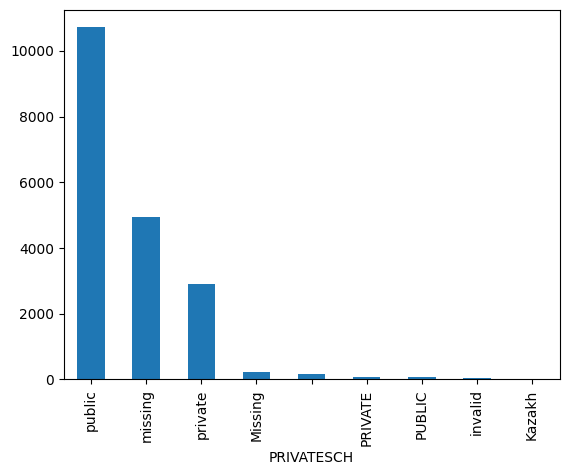

In [23]:
df_school_filt['PRIVATESCH'].value_counts().plot(kind='bar')

<Axes: xlabel='SCHLTYPE'>

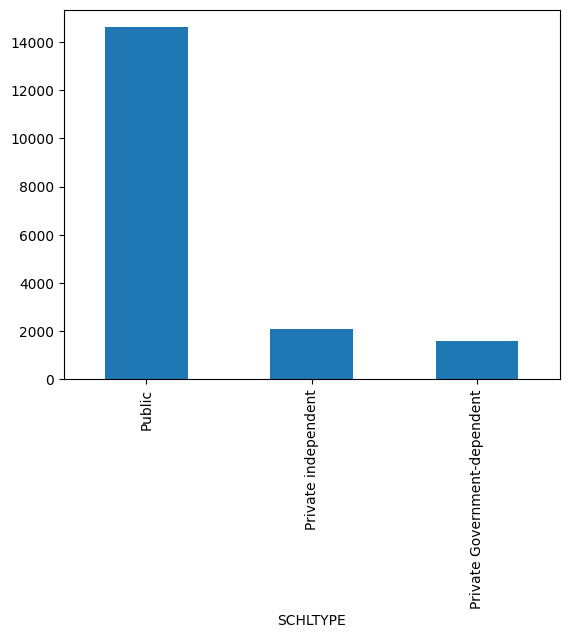

In [24]:
df_school_filt['SCHLTYPE'].value_counts().plot(kind='bar')

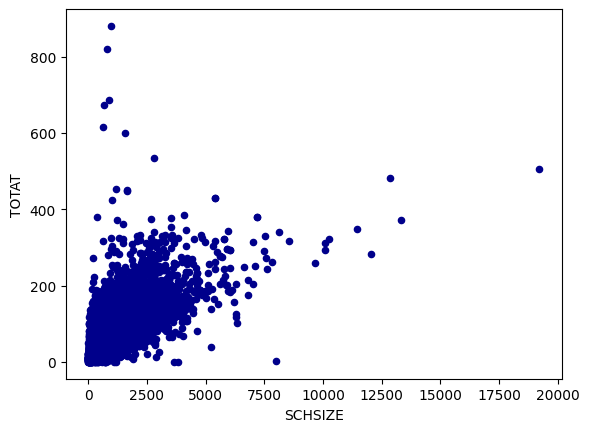

In [25]:
ax1 = df_school_filt.plot.scatter(x='SCHSIZE', y='TOTAT', c='DarkBlue')

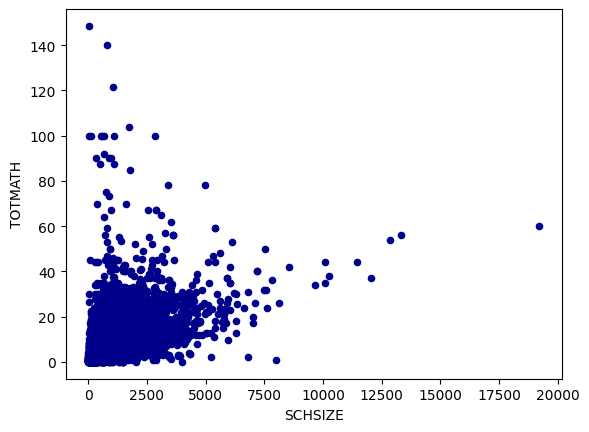

In [26]:
ax1 = df_school_filt.plot.scatter(x='SCHSIZE', y='TOTMATH', c='DarkBlue')

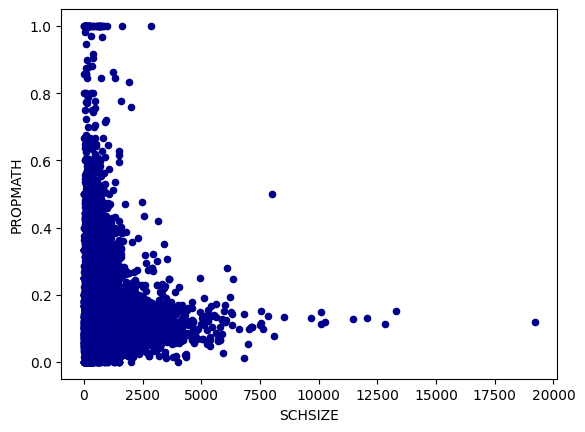

In [27]:
ax1 = df_school_filt.plot.scatter(x='SCHSIZE', y='PROPMATH', c='DarkBlue')

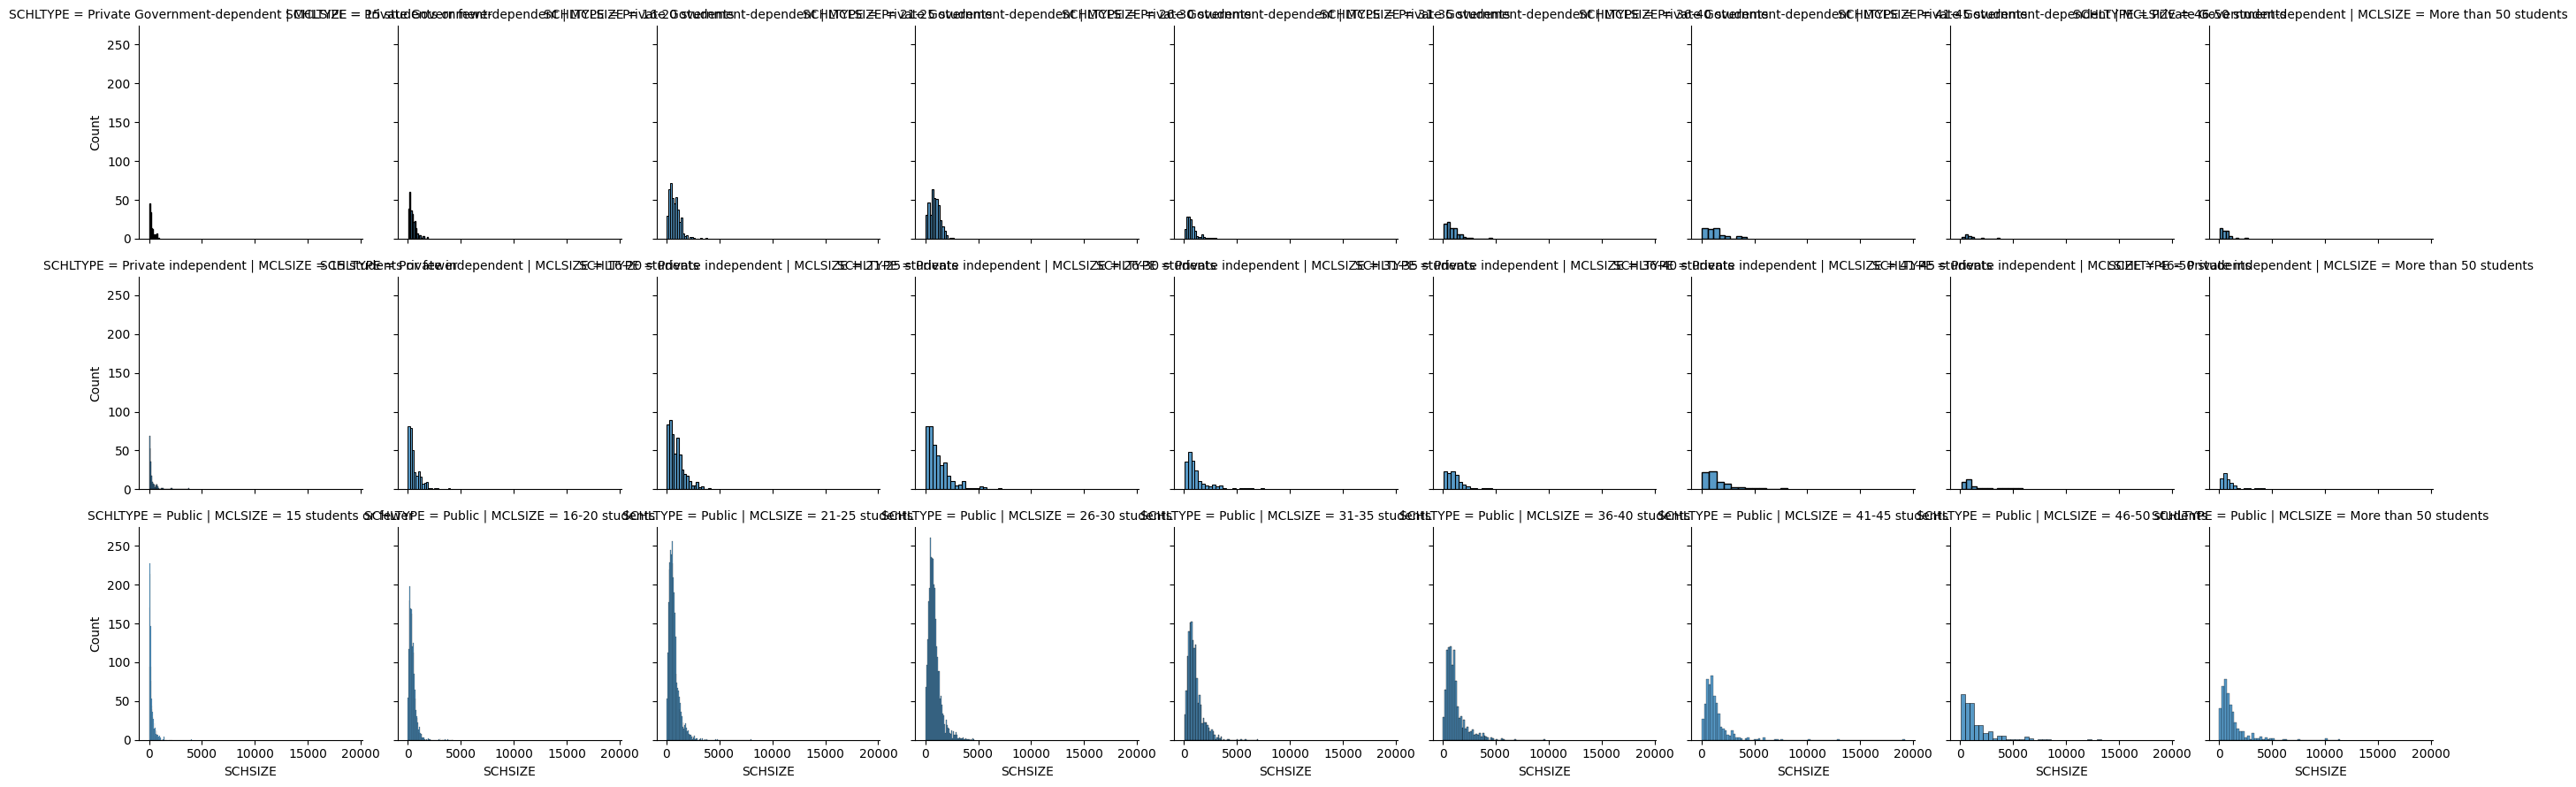

In [28]:
g = sns.FacetGrid(df_school_filt, row='SCHLTYPE', col="MCLSIZE")
g.map(sns.histplot, "SCHSIZE")
plt.show()

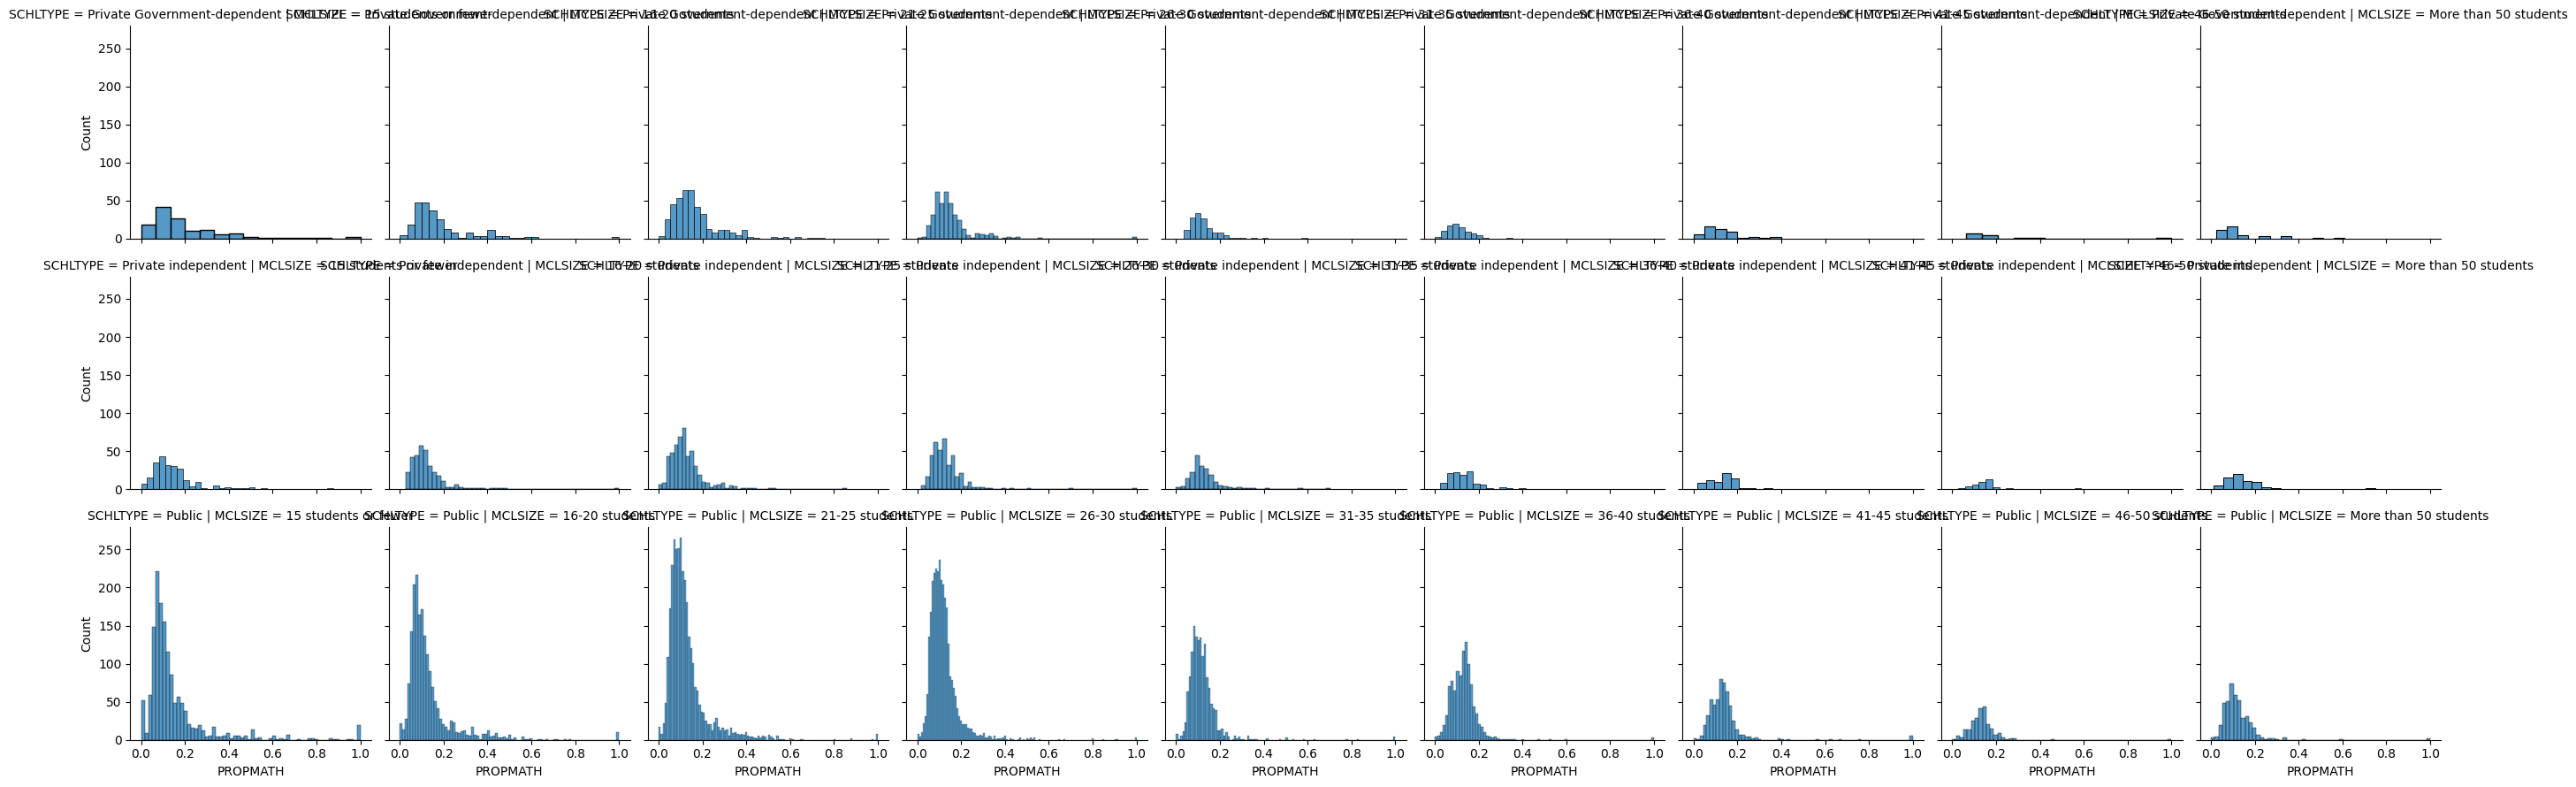

In [29]:
g = sns.FacetGrid(df_school_filt, row='SCHLTYPE', col="MCLSIZE")
g.map(sns.histplot, "PROPMATH")
plt.show()

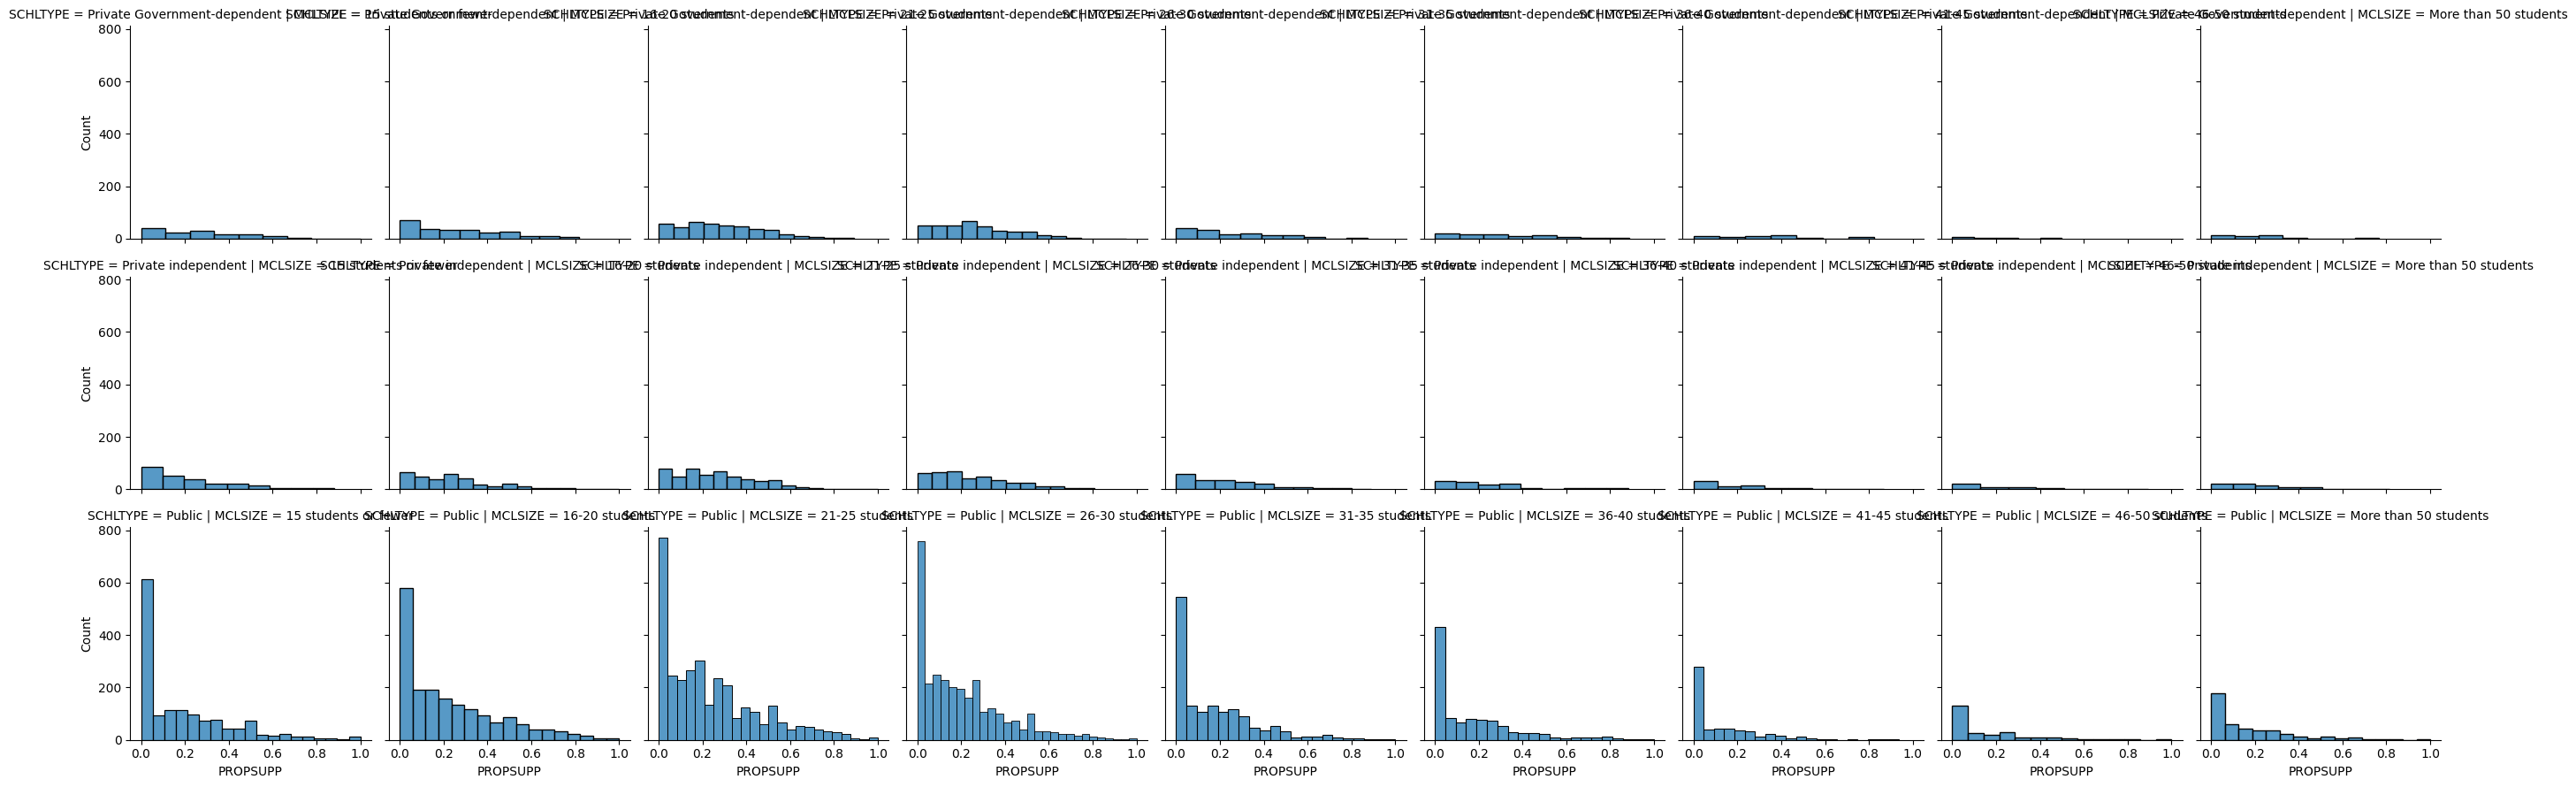

In [30]:
g = sns.FacetGrid(df_school_filt, row='SCHLTYPE', col="MCLSIZE")
g.map(sns.histplot, "PROPSUPP")
plt.show()

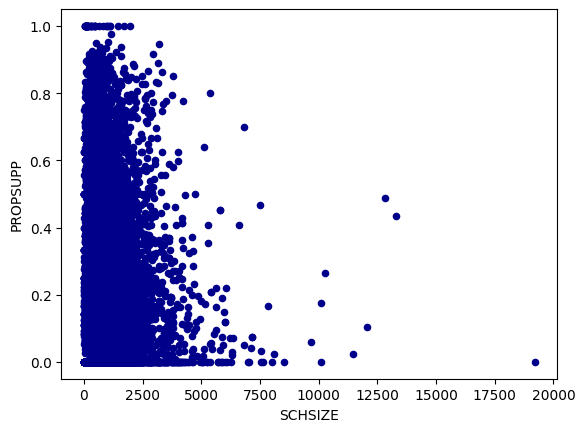

In [31]:
ax1 = df_school_filt.plot.scatter(x='SCHSIZE', y='PROPSUPP', c='DarkBlue')

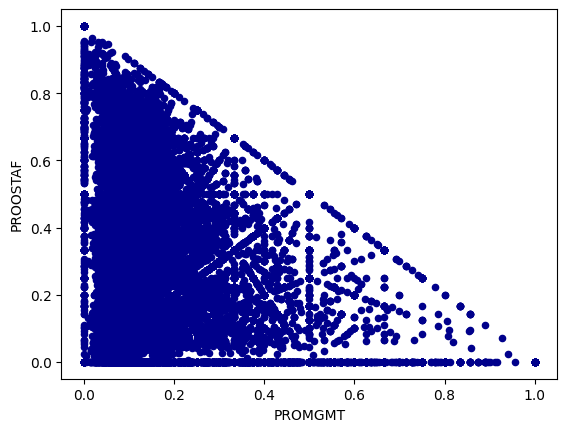

In [32]:
ax1 = df_school_filt.plot.scatter(x='PROMGMT', y='PROOSTAF', c='DarkBlue')

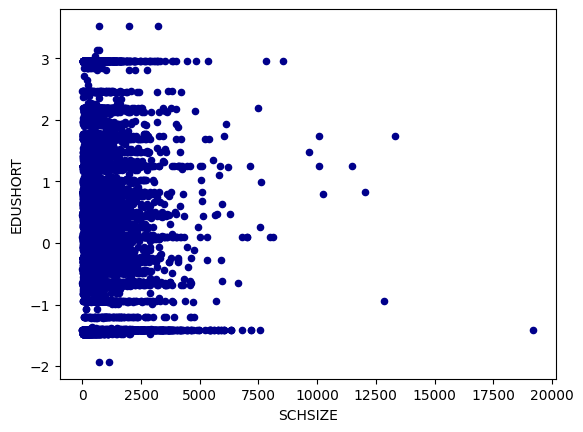

In [33]:
ax1 = df_school_filt.plot.scatter(x='SCHSIZE', y='EDUSHORT', c='DarkBlue')

School Support Pandemic
* `SCSUPRTED`	School Closure Support from Education Authorities
* `SCSUPRT`	School Closure Support from Other Sources
* `PROBSCRI`	Problems with Schools’ Capacity to Provide Remote Instruction (WLE)
* `SCPREPBP`	School Preparation for Remote Instruction, Before Pandemic (WLE)
* `SCPREPAP`	School Preparation for Remote Instruction, In Response to Pandemic (WLE)
* `DIGPREP`	Preparedness for Digital Learning (WLE)

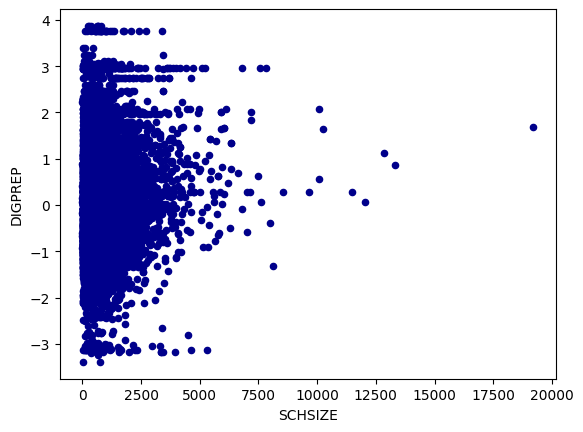

In [34]:
ax1 = df_school_filt.plot.scatter(x='SCHSIZE', y='DIGPREP', c='DarkBlue')

School Climate
* `OPENCUL`	Openness culture/climate (WLE)
* `NEGSCLIM`	Negative school climate (WLE)
* `DMCVIEWS`	School diversity and multi-cultural views (WLE)
* `STUBEHA`	Student-related factors affecting school climate (WLE)
* `TEACHBEHA`	Teacher-related factors affecting school climate (WLE)
* `TEAFDBK`	Feedback to teachers (WLE)
* `MTTRAIN`	Mathematics teacher training (WLE)

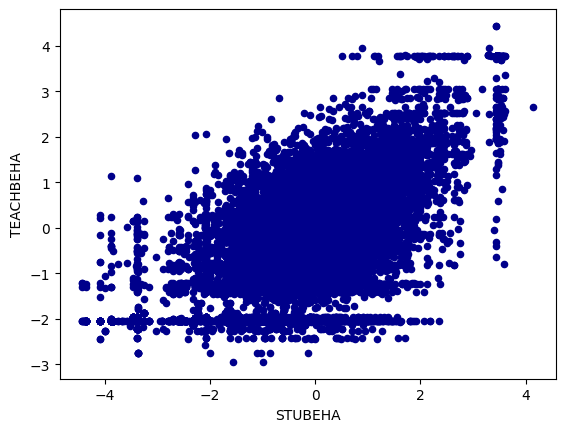

In [35]:
ax1 = df_school_filt.plot.scatter(x='STUBEHA', y='TEACHBEHA', c='DarkBlue')

School Autonomy
* `SCHSEL`	School selectivity
* `SCHAUTO`	School autonomy (WLE)
* `TCHPART`	Teacher participation (WLE)
* `SRESPCUR` School responsibility for curriculum
* `SRESPRES` School responsibility for resources
* `EDULEAD`	Educational leadership (WLE)
* `INSTLEAD` Instructional leadership (WLE)
* `ENCOURPG` School encouragement of parent or guardian involvement (WLE)

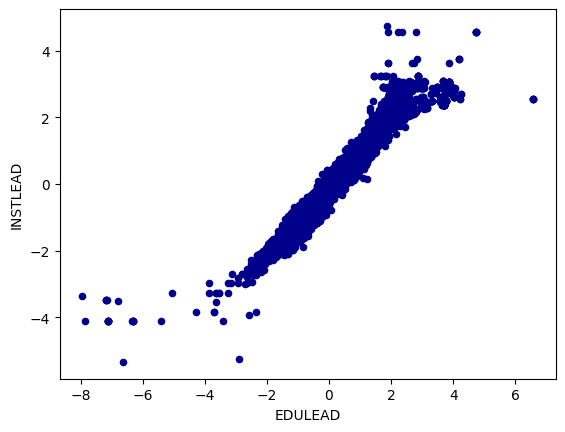

In [36]:
ax1 = df_school_filt.plot.scatter(x='EDULEAD', y='INSTLEAD', c='DarkBlue')

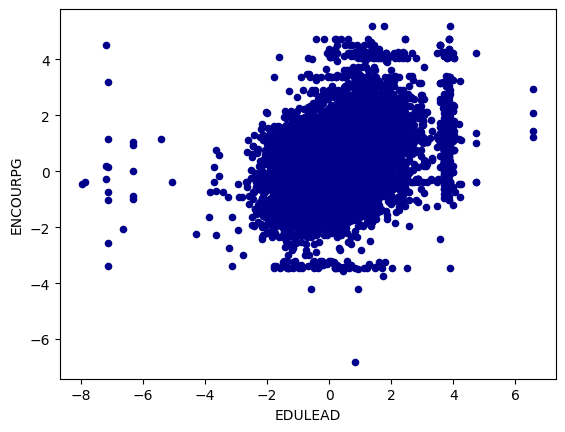

In [37]:
ax1 = df_school_filt.plot.scatter(x='EDULEAD', y='ENCOURPG', c='DarkBlue')

School Opportunities for Creativity
* `STDTEST`	Use of standardized tests (WLE)
* `TDTEST`	Use of teacher-developed tests (WLE)
* `CREACTIV` Creative extra-curricular activities (3 activities)
* `ALLACTIV` Extra-curricular activities offered (all) (WLE)
* `BCREATSC`	Beliefs about creativity (WLE)
* `CREENVSC`	Creative school environment (WLE)
* `ACTCRESC`	Creative school activities offered (WLE)

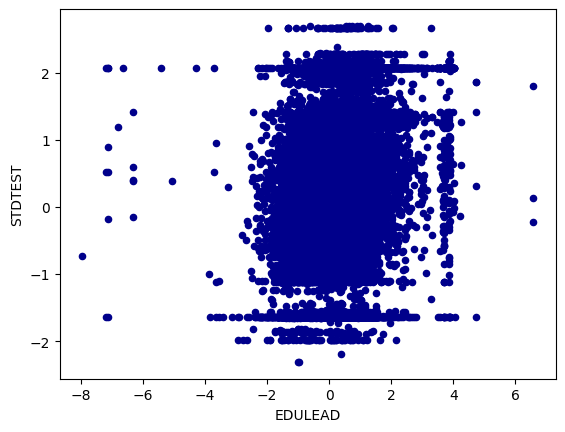

In [38]:
ax1 = df_school_filt.plot.scatter(x='EDULEAD', y='STDTEST', c='DarkBlue')

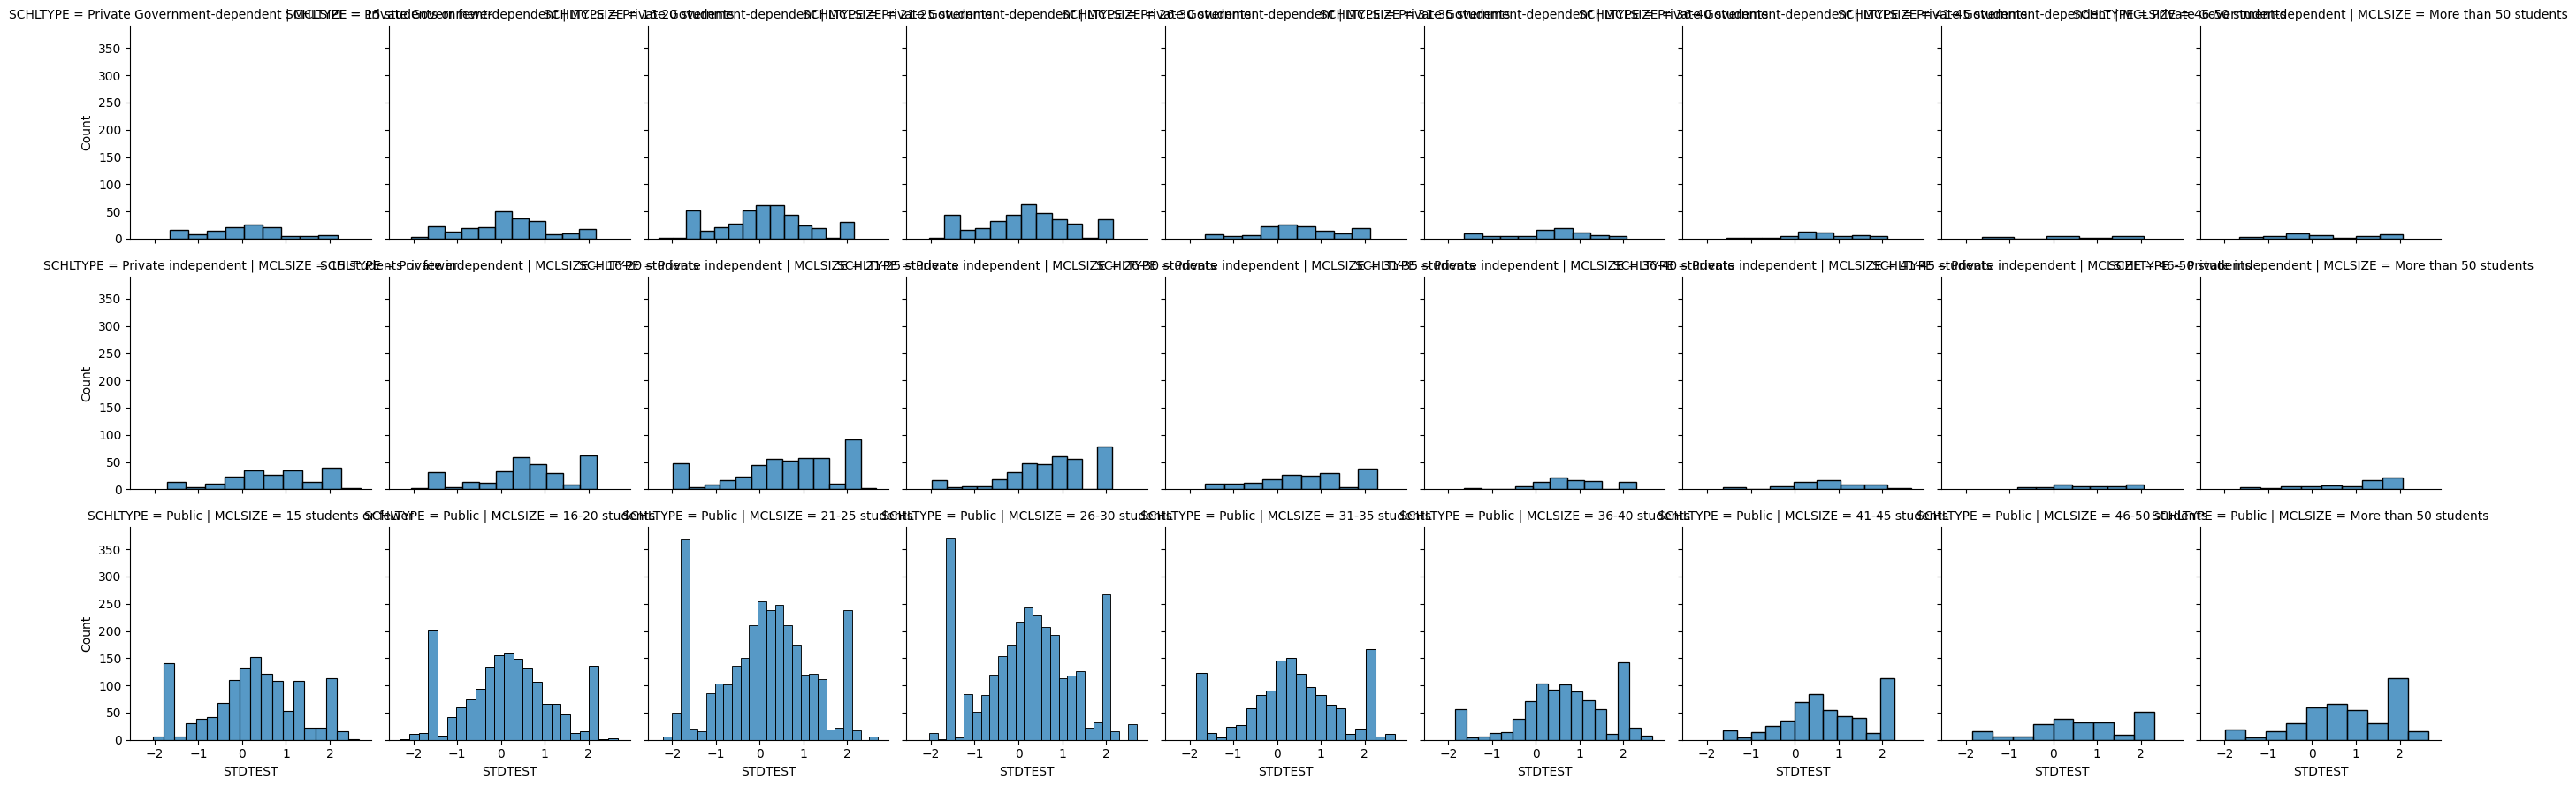

In [39]:
g = sns.FacetGrid(df_school_filt, row='SCHLTYPE', col="MCLSIZE")
g.map(sns.histplot, "STDTEST")
plt.show()

School Opportunities for Math
* `MACTIV`	Mathematics-related extra-curricular activities at school 
* `MATHEXC`	Mathematics extension courses offered at school
* `ABGMATH`	Ability grouping for mathematics classes

School Academic Performance
* `W_SCHGRNRABWT`   GRADE NONRESPONSE ADJUSTED SCHOOL BASE WEIGHT
* `W_FSTUWT_SCH_SUM`    Sum of W_FSTUWT
* `W_FSTUWT_SCH_N`  N of W_FSTUWT
* `SENWT`   Senate Weight (sum of 5000 per country)

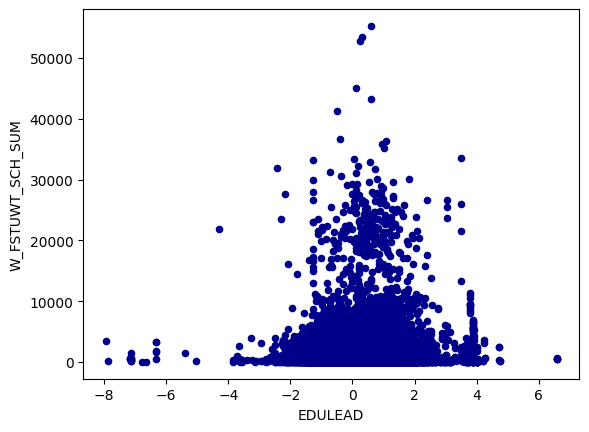

In [40]:
ax1 = df_school_filt.plot.scatter(x='EDULEAD', y='W_FSTUWT_SCH_SUM', c='DarkBlue')

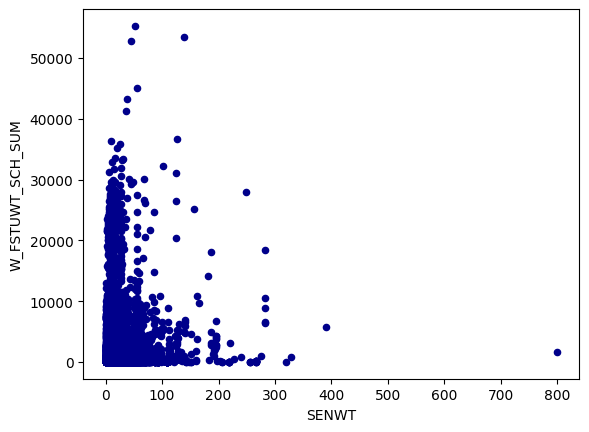

In [41]:
ax1 = df_school_filt.plot.scatter(x='SENWT', y='W_FSTUWT_SCH_SUM', c='DarkBlue')

School Computers
* `RATCMP1`	Availability of computers    
* `RATCMP2`	Computers connected to the Internet
* `RATTAB`	Availability of tablet devices
* `DIGDVPOL`	Digital device policies at school (WLE)

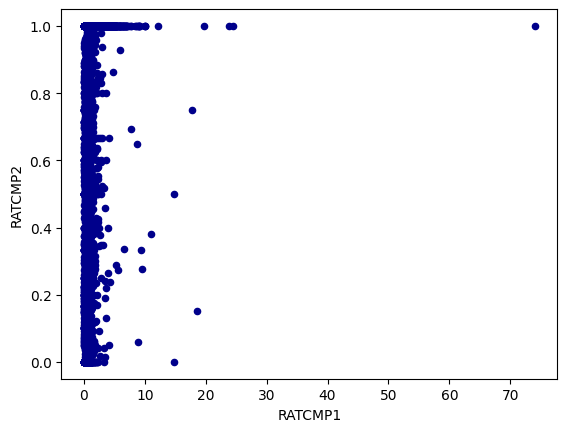

In [42]:
ax1 = df_school_filt.plot.scatter(x='RATCMP1', y='RATCMP2', c='DarkBlue')

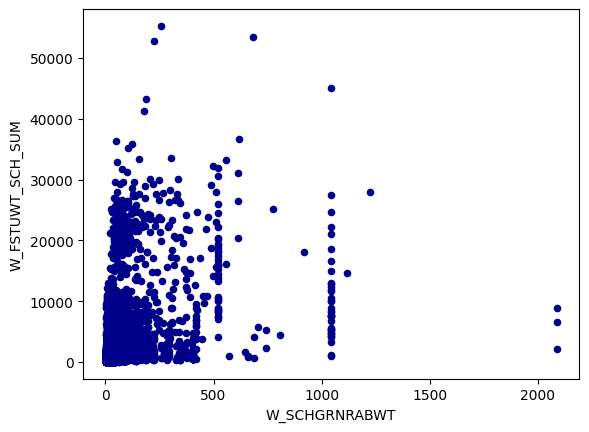

In [43]:
ax1 = df_school_filt.plot.scatter(x='W_SCHGRNRABWT', y='W_FSTUWT_SCH_SUM', c='DarkBlue')

## Description

In [44]:
df_school.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21629 entries, 0 to 21628
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CNT               21629 non-null  category
 1   CNTRYID           21629 non-null  category
 2   CNTSCHID          21629 non-null  category
 3   CYC               21629 non-null  category
 4   NatCen            21629 non-null  category
 5   STRATUM           21629 non-null  category
 6   SUBNATIO          21629 non-null  category
 7   REGION            21629 non-null  category
 8   OECD              21629 non-null  category
 9   ADMINMODE         21629 non-null  category
 10  LANGTEST_QQQ      20769 non-null  category
 11  PRIVATESCH        21629 non-null  category
 12  SCHLTYPE          20007 non-null  category
 13  SCHSIZE           18643 non-null  float64 
 14  TOTAT             18433 non-null  float64 
 15  PROATCE           17380 non-null  float64 
 16  PROPAT6           1306

In [45]:
df_school.describe(include=["float64"])

,SCHSIZE,TOTAT,PROATCE,PROPAT6,PROPAT7,PROPAT8,STRATIO,TOTMATH,PROPMATH,SMRATIO,TOTSTAFF,PROPSUPP,PROADMIN,PROMGMT,PROOSTAF,SCHAUTO,TCHPART,SRESPCUR,SRESPRES,EDULEAD,INSTLEAD,ENCOURPG,RATCMP1,RATCMP2,RATTAB,DIGDVPOL,TEAFDBK,MTTRAIN,DMCVIEWS,NEGSCLIM,STAFFSHORT,EDUSHORT,STUBEHA,TEACHBEHA,STDTEST,TDTEST,BCREATSC,CREENVSC,ACTCRESC,OPENCUL,PROBSCRI,SCPREPBP,SCPREPAP,DIGPREP,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,W_FSTUWT_SCH_N,SENWT
count,18643.000000,18433.000000,17380.000000,13066.00000,18175.000000,18380.000000,17884.000000,18550.000000,19189.000000,18115.000000,18666.000000,19362.000000,19195.000000,19492.000000,19101.000000,16070.000000,13669.000000,19765.000000,19700.000000,18412.000000,18231.000000,18877.000000,17472.000000,17567.000000,18242.000000,9882.000000,19340.000000,19488.000000,16447.000000,18318.000000,17138.000000,19172.000000,17867.000000,19561.000000,17658.000000,18197.000000,13817.000000,18764.000000,15755.000000,18742.000000,15249.000000,15853.000000,10904.000000,17579.000000,21629.000000,21629.000000,21629.000000,21629.000000
mean,779.842086,57.681794,0.774854,0.76762,0.324948,0.017850,14.171604,6.860782,0.136182,84.237530,25.194793,0.222012,0.255031,0.234917,0.288102,-0.267386,0.063714,2.018988,2.127722,0.282021,0.270858,0.254279,0.739550,0.873576,0.364567,-0.143881,0.284925,0.155301,0.030782,-0.131584,0.101186,-0.007990,-0.088141,-0.089859,0.265124,0.293629,0.176828,0.173734,0.012528,0.126592,0.204167,0.058741,0.034614,0.055921,22.352916,1306.357484,28.375977,18.493689
std,772.880165,48.919475,0.348233,0.34120,0.328759,0.050695,8.801856,7.119782,0.106685,24.287792,30.994188,0.213701,0.194793,0.197372,0.241928,1.266724,1.128682,1.884974,2.523073,1.052933,1.042473,1.061013,1.026215,0.304599,3.624687,1.228260,1.125337,0.994178,1.120369,1.097219,1.189631,1.212086,1.243861,1.194944,1.097989,1.064502,1.021847,1.053131,1.044542,1.046475,1.053837,1.130747,0.997086,0.991114,72.760977,3143.223462,16.088033,22.462552
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.203700,-2.714200,0.200000,0.142900,-7.947200,-5.334800,-6.815400,0.000000,0.000000,0.000000,-7.006900,-2.455200,-2.234700,-3.935900,-2.299200,-2.387100,-1.931900,-4.422000,-2.950500,-2.309000,-3.703300,-3.105500,-4.304100,-4.219500,-4.136700,-3.036500,-0.832000,-4.168900,-3.384500,1.000000,1.000000,1.000000,0.057600
25%,306.000000,25.500000,0.697625,0.60000,0.058800,0.000000,9.355100,3.000000,0.080000,72.174250,9.000000,0.014975,0.119150,0.105300,0.049000,-0.618100,-0.623700,0.500000,0.333300,-0.375100,-0.422600,-0.419100,0.241900,1.000000,0.000000,-0.804400,-0.329600,-0.453900,-0.687050,-0.890500,-0.691300,-1.421200,-0.785900,-0.903300,-0.409700,-0.347200,-0.655400,-0.268600,-0.553600,-0.607775,-0.568700,-0.831400,-0.595400,-0.613950,1.977730,142.250000,19.000000,5.506350
50%,600.000000,46.000000,0.977100,0.97405,0.187500,0.000000,12.486250,5.000000,0.113200,100.000000,17.000000,0.173900,0.212100,0.178850,0.264700,-0.070400,0.106800,1.000000,1.000000,0.264800,0.268500,0.244000,0.566000,1.000000,0.000000,-0.090000,0.278700,0.356500,-0.052100,-0.143700,0.159000,-0.070300,-0.038400,-0.045200,0.284500,0.285100,0.274900,-0.268600,0.024800,0.128600,0.189600,-0.688300,0.507700,-0.011400,5.514940,341.660400,30.000000,12.053210
75%,1007.000000,75.000000,1.000000,1.00000,0.533300,0.020000,16.544750,9.000000,0.154500,100.000000,30.000000,0.341500,0.333300,0.307700,0.470600,0.487475,0.810900,5.000000,1.666700,0.929075,0.963900,0.931700,1.000000,1.000000,0.313375,0.639200,0.934225,1.098200,0.650300,0.602900,0.824200,0.800600,0.720000,0.613000,0.999600,0.959800,1.221400,0.832600,0.590800,0.610475,0.923500,0.749900,0.846200,0.574500,16.395950,1069.565000,37.000000,24.069060
max,19201.000000,1025.000000,1.000000,1.00000,1.000000,1.000000,100.000000,148.500000,1.000000,100.000000,708.000000,1.000000,1.000000,1.000000,1.000000,3.756800,4.488600,5.000000,7.000000,6.573600,4.744400,5.192900,7

In [46]:
df_school.describe(include=['category'])

,CNT,CNTRYID,CNTSCHID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,ADMINMODE,LANGTEST_QQQ,PRIVATESCH,SCHLTYPE,SCHSEL,MCLSIZE,CLSIZE,CREACTIV,ALLACTIV,MACTIV,MATHEXC,ABGMATH,SCSUPRTED,SCSUPRT,VER_DAT
count,21629,21629,21629.0,21629,21629,21629,21629,21629,21629,21629,20769,21629,20007,19935,18156,18475,19412,15190.0000,19556,11680,19315,15277,15259,21629
unique,80,80,21629.0,1,84,1014,88,138,2,2,54,9,3,3,9,9,4,4122.0000,6,4,3,3,3,81
top,Spain,Spain,90100182.0,08MS,Spain,Undisclosed STRATUM - Canada,Spain,United Arab Emirates,Yes,Computer,Spanish,public,Public,at least one factor was considered always,21-25 students,21-25 students,1 creative extra-curricular activity offered,2.4383,1 mathematics-related extra-curricular activit...,Mathematics extension courses offered for enri...,At least one form of ability grouping in all c...,Some support from education authorities,Some support from other resources,01MAY23:16:50:04
freq,966,966,1.0,21629,966,863,966,840,11108,20697,3907,11924,16017,8934,4646,4750,5334,354.0000,4057,7246,8091,8912,10406,966
